In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dir=r"FGD"

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3562 files belonging to 2 classes.
Using 2850 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3562 files belonging to 2 classes.
Using 712 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['with_glasses', 'without_glasses']


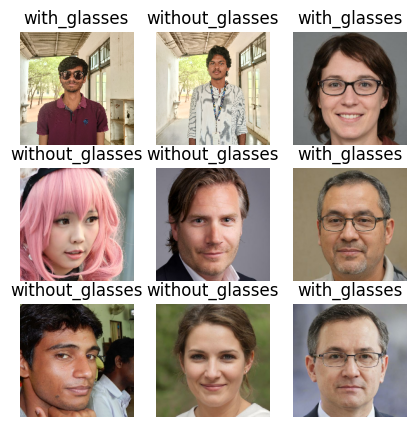

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
epochs_hist = model.fit(
              train_ds, 
              validation_data=val_ds ,
              epochs=epochs
)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 446ms/step - accuracy: 0.5510 - loss: 0.8864 - val_accuracy: 0.8862 - val_loss: 0.3838
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 408ms/step - accuracy: 0.8811 - loss: 0.3146 - val_accuracy: 0.9242 - val_loss: 0.2554
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 407ms/step - accuracy: 0.9241 - loss: 0.2074 - val_accuracy: 0.8904 - val_loss: 0.3089
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 425ms/step - accuracy: 0.9300 - loss: 0.1629 - val_accuracy: 0.9185 - val_loss: 0.2071
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 453ms/step - accuracy: 0.9488 - loss: 0.1121 - val_accuracy: 0.9242 - val_loss: 0.1825
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 422ms/step - accuracy: 0.9731 - loss: 0.0760 - val_accuracy: 0.9326 - val_loss: 0.1712
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - accuracy: 0.9794 - loss: 0.0566 - val_accuracy: 0.9298 - val_loss: 0.2311
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - accuracy: 0.9867 - loss: 0.0355 - val_accu

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
model.save('face_glass.keras')

In [ ]:
score = model.evaluate(train_ds, batch_size=32, verbose=1)

In [ ]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

In [ ]:
model.save('MODEL_FGD.keras')

In [ ]:
import gradio as gr
from tensorflow.keras.preprocessing import image
from PIL import Image
def preprocess_image(img):
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    img = img.resize((180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
def face_glass(img):
    img_array = preprocess_image(img)
    predictions = model.predict(img_array)
    predicted_value = class_names[np.argmax(predictions)]
    if predicted_value == 'with_glasses':
        return "Person is wearing glasses"
    else:
        return "Person is not wearing glasses"
    return predicted_value
iface = gr.Interface(fn=face_glass, inputs="image", outputs="text").launch(share='True')

